### The goal of this XP:
Create a outline image for functional QC in zooniverse platform - Brain Match 
1. Create functionl brain border outline
2. Assemnble left/right funtional brain layout
3. Merge all Layout
3. Visualise in a montage

In [20]:
clear all
% build path
addpath(genpath('../Misc'))
build_path  niak psom zooniverse_qc  

Adding library niak to the search path.

Adding library psom to the search path.

Adding library zooniverse_qc to the search path.



### First create brain outlines

In [21]:
# Set path
path_root = '/home/yassinebha/Drive/QC_zooniverse/';
path_outline = [path_root 'template_layout/brain_outline_bold/'];
path_layout = [path_root 'template_layout/layout/'];

In [22]:
# Reshape 
command_reshape = ['mincresample -clobber ' path_outline 'func_mask_average_stereonl.mnc.gz ' path_outline 'func_mask_average_stereonl_1mm.mnc -like ' path_outline 'mni_icbm152_t1_tal_nlin_asym_09a_mask_dilated5mm.mnc.gz -trilinear'];
system(command_reshape);
[hdr,avg_mask_bold] = niak_read_vol([path_outline 'func_mask_average_stereonl_1mm.mnc']);
[hdr,mask_t1] = niak_read_vol([path_outline 'mni_icbm152_t1_tal_nlin_asym_09a_mask.mnc.gz']);

Transforming slices:.............................................................................................................................................................................................Done


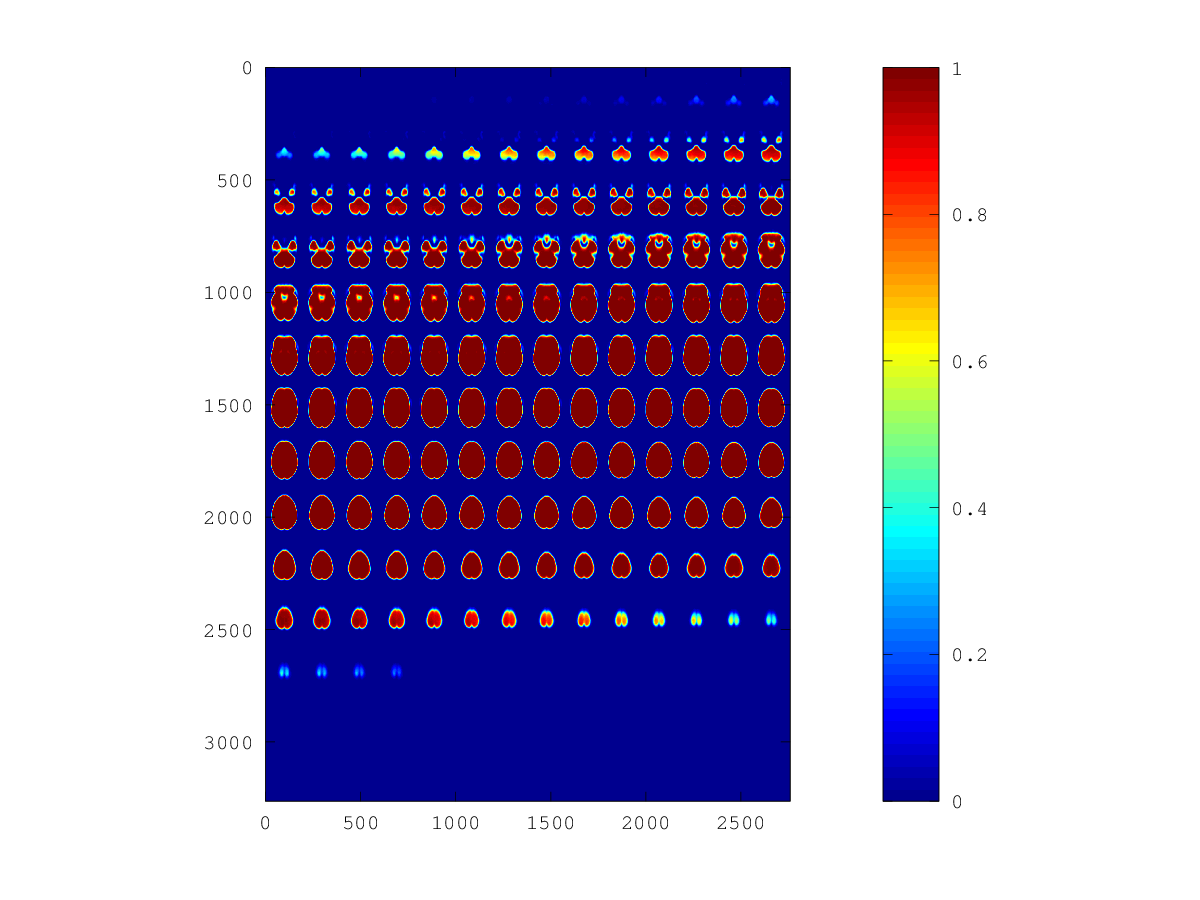

In [23]:
niak_montage(avg_mask_bold)

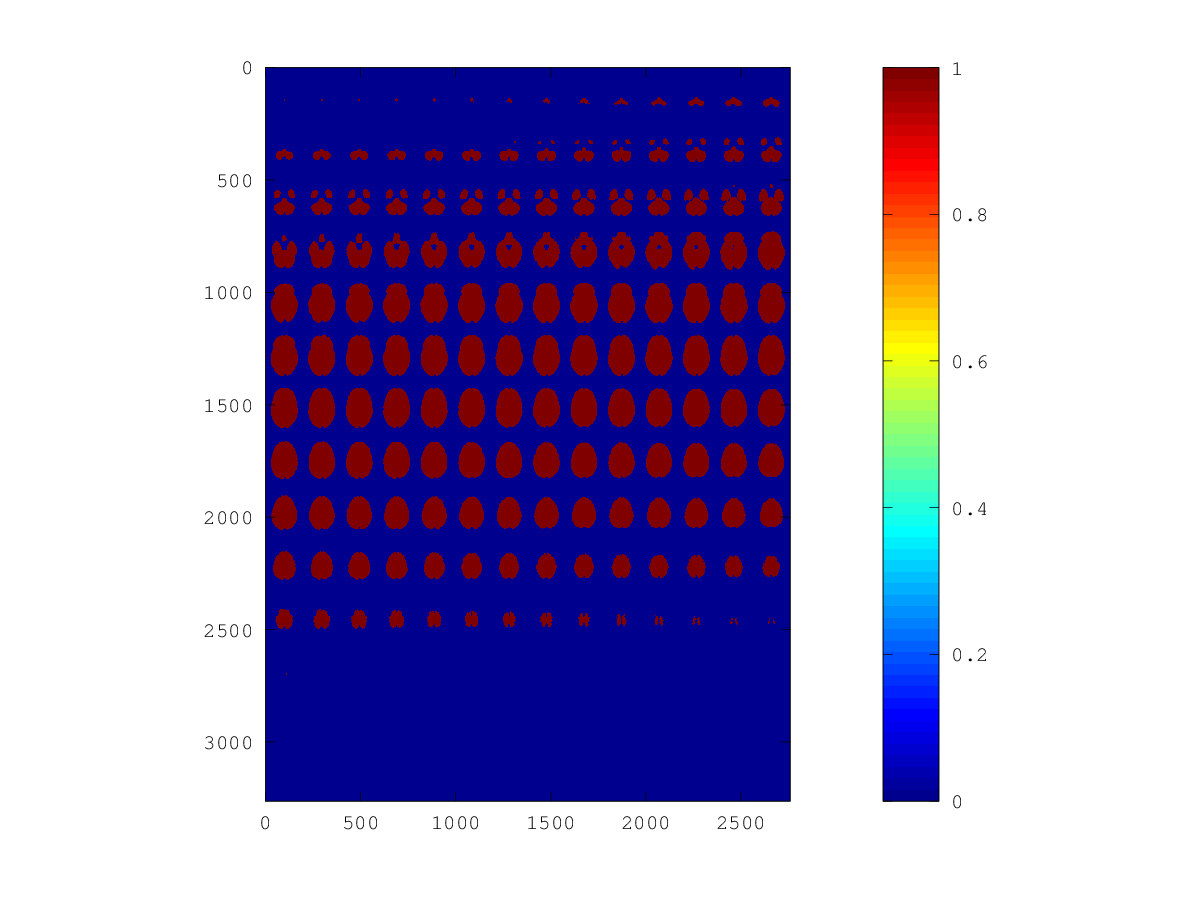

In [24]:
niak_montage(mask_t1)

In [30]:
# Create brain border mask
mask_t1_d = niak_morph(mask_t1,'-successive DDD');
bold_in = avg_mask_bold>0.8;
%bold_out = (avg_mask_bold>0)&~bold_in;
bold_outline = ~bold_in&mask_t1_d;
%mask = bold_out | t1_out;
hdr.file_name = [path_outline 'mask_outline_brain_bold.nii.gz'];
niak_write_vol(hdr,bold_outline);

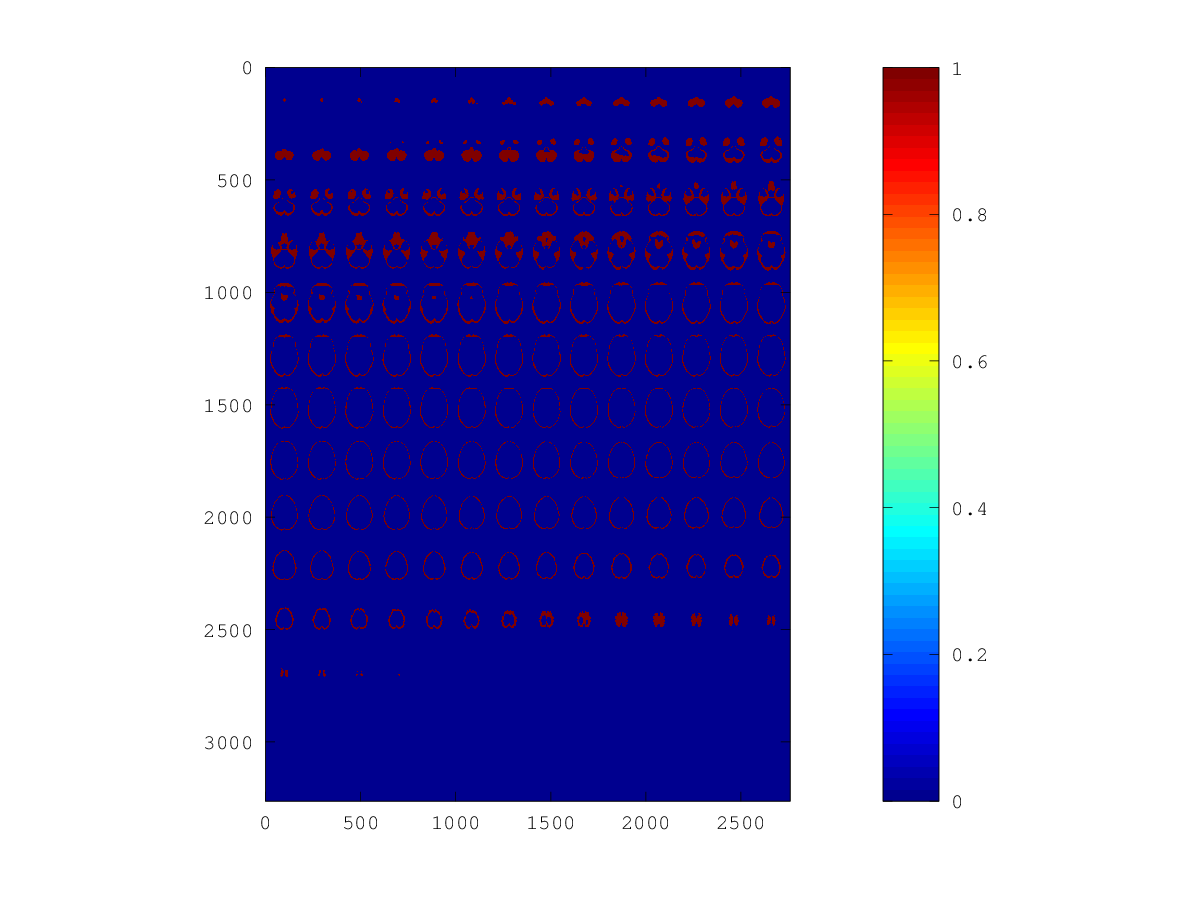

In [31]:
niak_montage(bold_outline)

### Second assemble brain layout